In [48]:
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
SDG_MAP = {
    "SDG 1": "1 - No Poverty",
    "SDG 2": "2 - Zero Hunger",
    "SDG 3": "3 - Good Health and Well-Being",
    "SDG 4": "4 - Quality Education",
    "SDG 5": "5 - Gender Equality",
    "SDG 6": "6 - Clean Water and Sanitation",
    "SDG 7": "7 - Affordable and Clean Energy",
    "SDG 8": "8 - Decent Work and Economic Growth",
    "SDG 9": "9 - Industry, Innovation, and Infrastructure",
    "SDG 10": "10 - Reduced Inequalities",
    "SDG 11": "11 - Sustainable Cities and Communities",
    "SDG 12": "12 - Responsible Consumption and Production",
    "SDG 13": "13 - Climate Action",
    "SDG 14": "14 - Life Below Water",
    "SDG 15": "15 - Life on Land",
    "SDG 16": "16 - Peace, Justice, and Strong Institutions",
}

In [44]:
# Gets SDG 1 to 16 predictions for project prediction files
# PROJECT_NAME = "all_undergrad_excel"
PROJECT_NAME = "grad_desc"
paths = glob(
    f"../data/predictions/*-logistic_regression-{PROJECT_NAME}-raw__predictions.jsonl"
)
ref_path = f"../data/raw/{PROJECT_NAME}.jsonl"
ref_data = pd.read_json(ref_path, lines=True)

combined = []
for path in paths:
    data = pd.read_json(path, lines=True)
    data = data.merge(ref_data, left_index=True, right_index=True)
    combined.append(data)

combined = pd.concat(combined)
combined.head(1)

,index,text_x,prediction,original_label,comparison,text_y,STRM,FACULTY DESC,DEPARTMENT,CRSE CAREER,...,CATALOG NBR,CLASS SECTION,CLASS DESCR,ENROLMENT,LAST TERM OFFERED,URL,cats,entities,labels,has_sdg
0,0,BUSINESS A701 / Intermediate Financial Account...,"{'category': 'SDG 1', 'prediction': 0, 'metada...",0,TN,BUSINESS A701 / Intermediate Financial Account...,2229,School of Graduate Studies,Faculty of Business (MBA),GRAD,...,A701,C01,Interm.Finc.Acct1,7,FALL 2022,https://academiccalendars.romcmaster.ca/previe...,[],[],[],False


In [45]:
def get_pred_details(row):
    try:
        pred_info = row["prediction"]
        SDG = pred_info["category"]
        pred = pred_info["prediction"]
        conf = pred_info["metadata"]["confidence"]
    except Exception as e:
        print(row)

    return SDG, pred, conf


combined["SDG"], combined["pred"], combined["confidence"] = zip(
    *combined.apply(get_pred_details, axis=1)
)
combined["sdg_name"] = combined["SDG"].apply(lambda x: SDG_MAP[x])

combined.iloc[0]

index                                                                0
text_x               BUSINESS A701 / Intermediate Financial Account...
prediction           {'category': 'SDG 1', 'prediction': 0, 'metada...
original_label                                                       0
comparison                                                          TN
text_y               BUSINESS A701 / Intermediate Financial Account...
STRM                                                              2229
FACULTY DESC                                School of Graduate Studies
DEPARTMENT                                   Faculty of Business (MBA)
CRSE CAREER                                                       GRAD
SSR COMPONENT                                                      LEC
CRSE_ID                                                         101593
COURSE CODE                                                   BUSADMIN
CATALOG NBR                                                       A701
CLASS 

In [52]:
def calculate_residuals(df):
    residuals = []
    for i, row in df.iterrows():
        ref_value = row["original_label"]
        pred = row["pred"]
        confidence = row["confidence"]

        if pred != ref_value:
            confidence = 1 - confidence

        residual = round(1 - confidence, 2)
        residuals.append(residual)

    return residuals


# Low residuals == more coherence
# High residuals == less coherence
combined["residuals"] = calculate_residuals(combined)

('1 - No Poverty', 0)


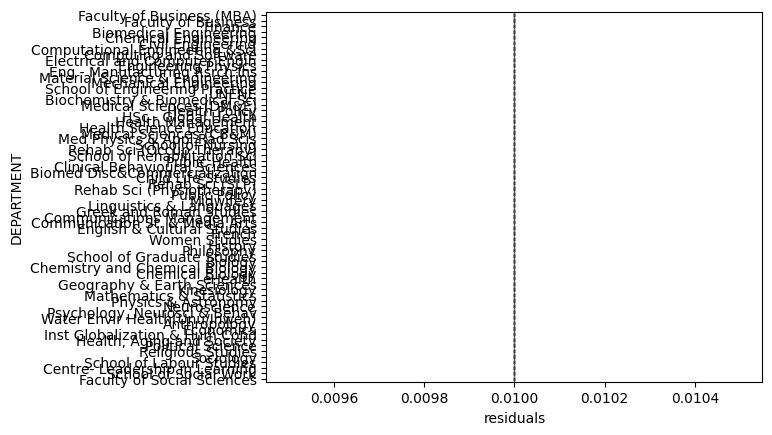

('1 - No Poverty', 1)


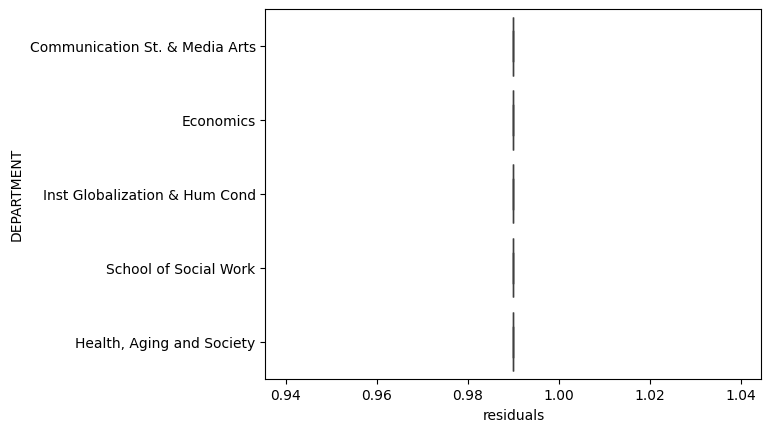

('10 - Reduced Inequalities', 0)


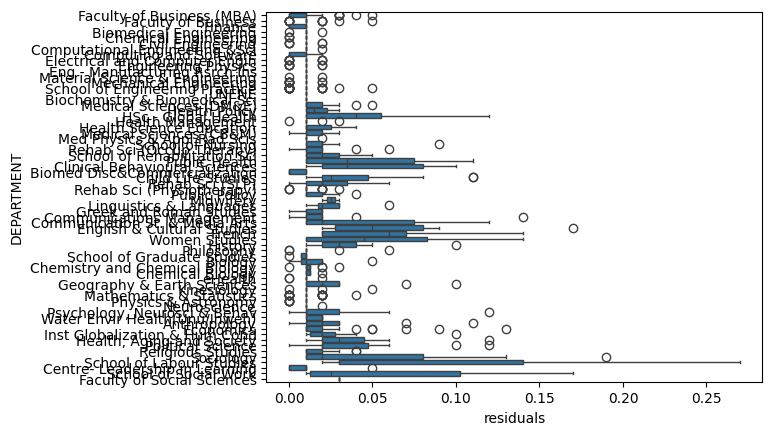

('10 - Reduced Inequalities', 1)


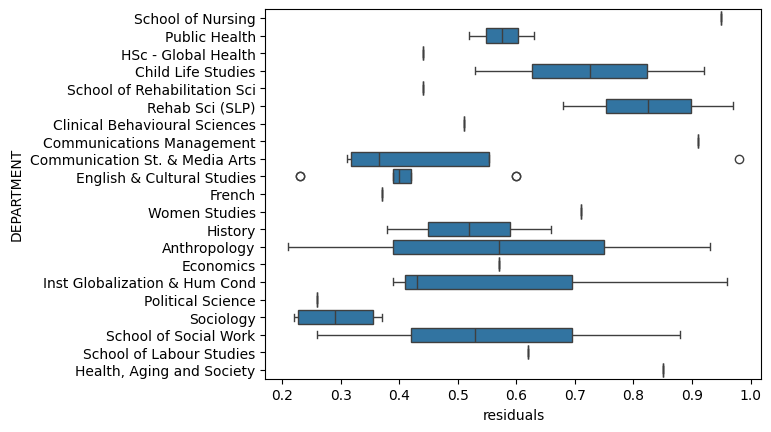

('11 - Sustainable Cities and Communities', 0)


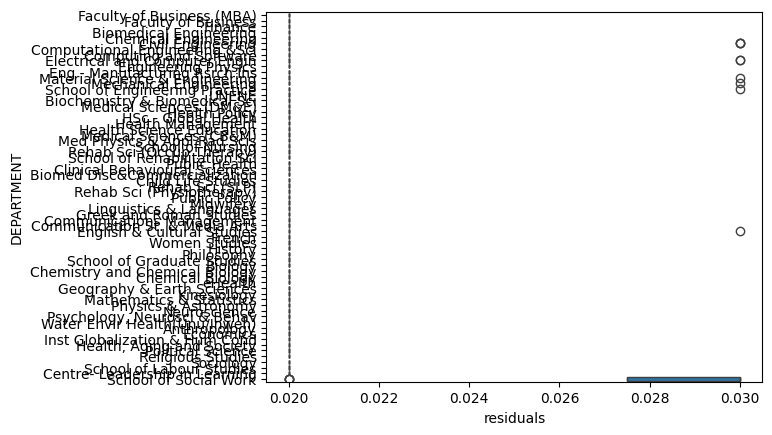

('11 - Sustainable Cities and Communities', 1)


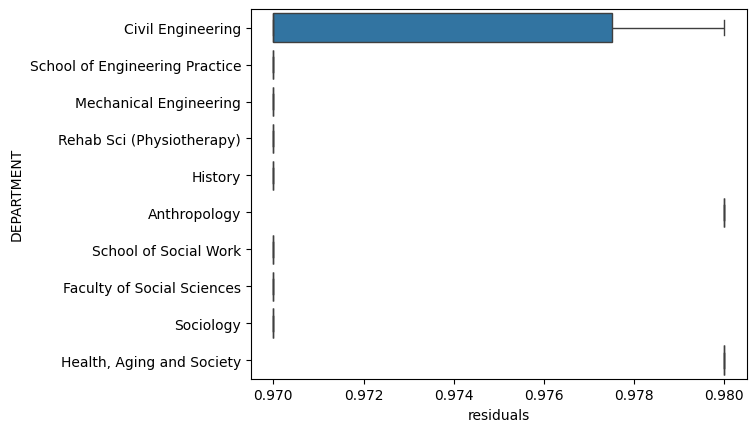

('12 - Responsible Consumption and Production', 0)


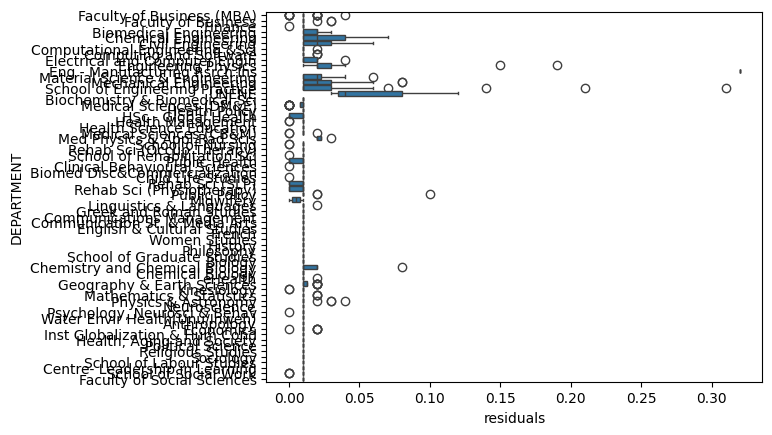

('12 - Responsible Consumption and Production', 1)


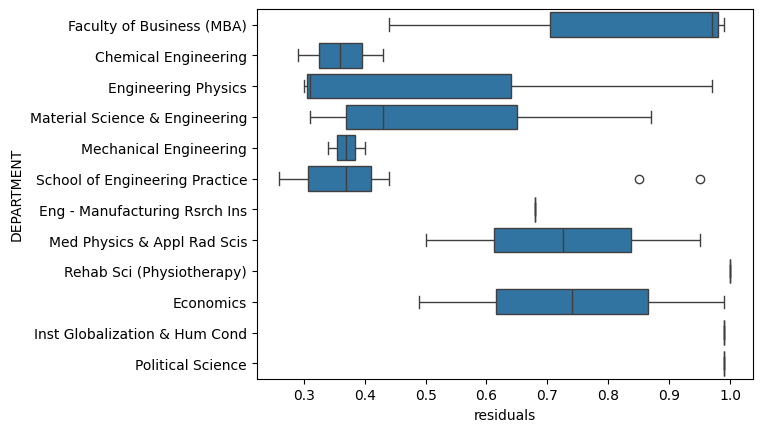

('13 - Climate Action', 0)


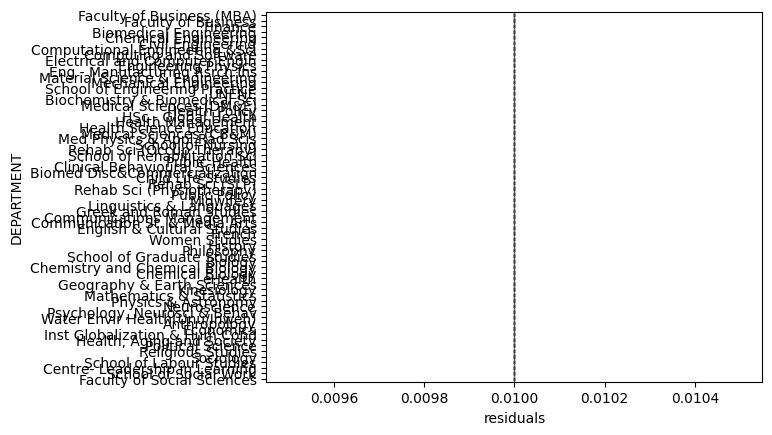

('13 - Climate Action', 1)


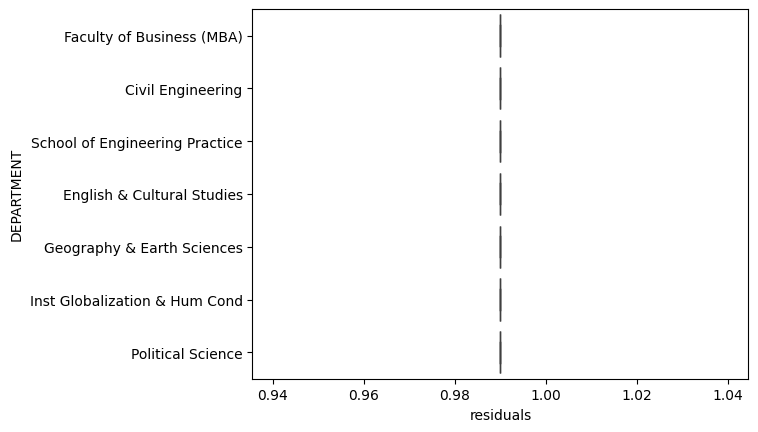

('14 - Life Below Water', 0)


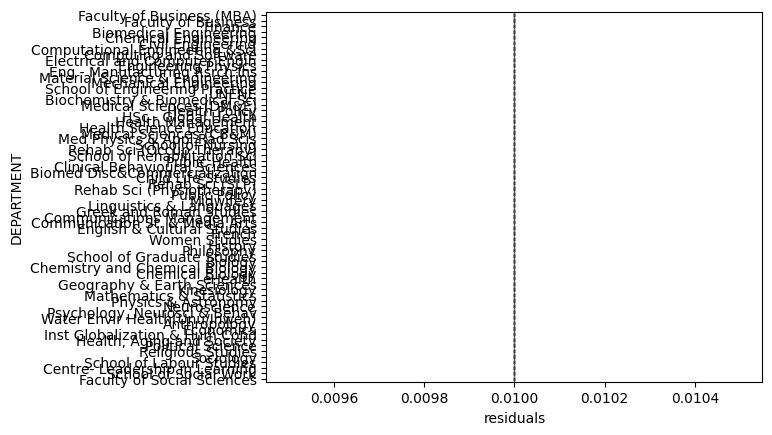

('14 - Life Below Water', 1)


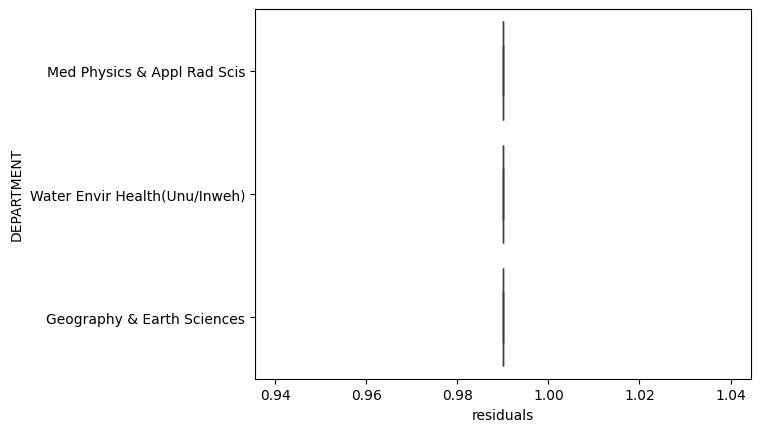

('15 - Life on Land', 0)


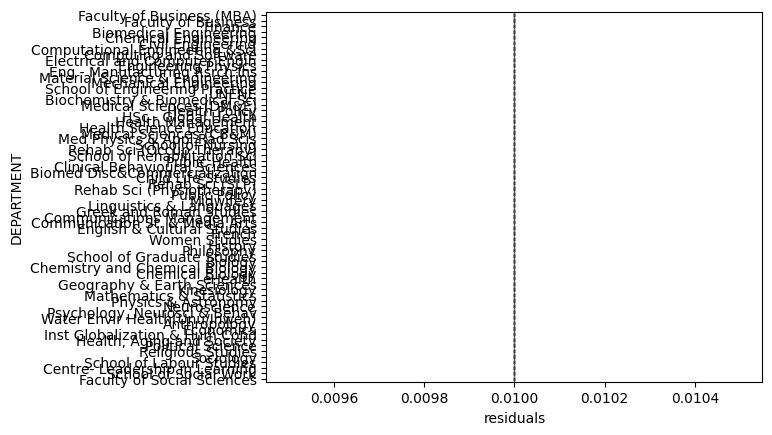

('15 - Life on Land', 1)


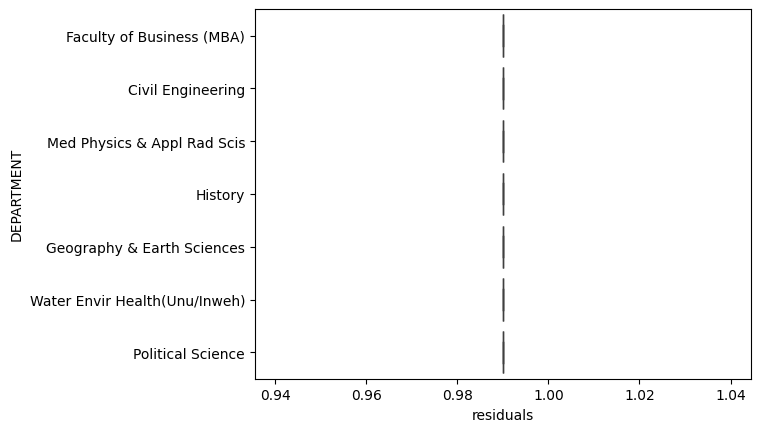

('16 - Peace, Justice, and Strong Institutions', 0)


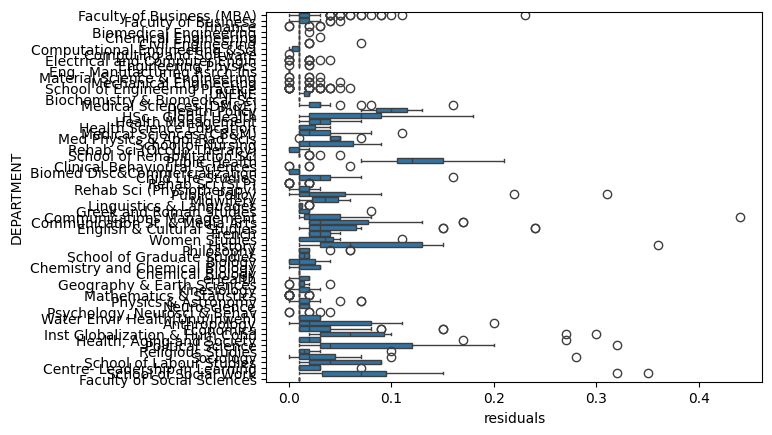

('16 - Peace, Justice, and Strong Institutions', 1)


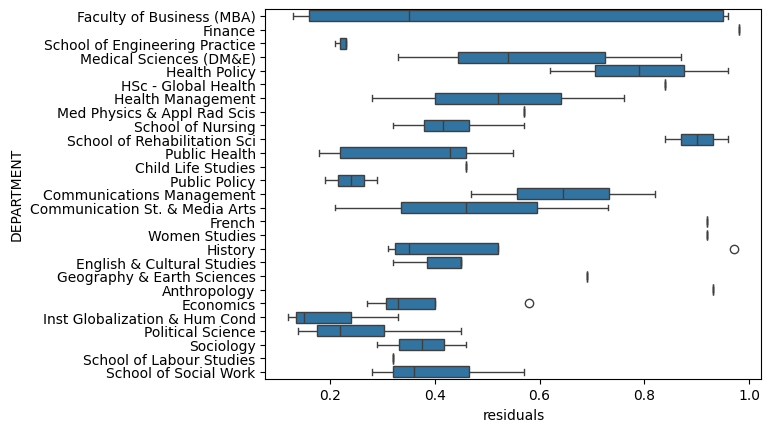

('2 - Zero Hunger', 0)


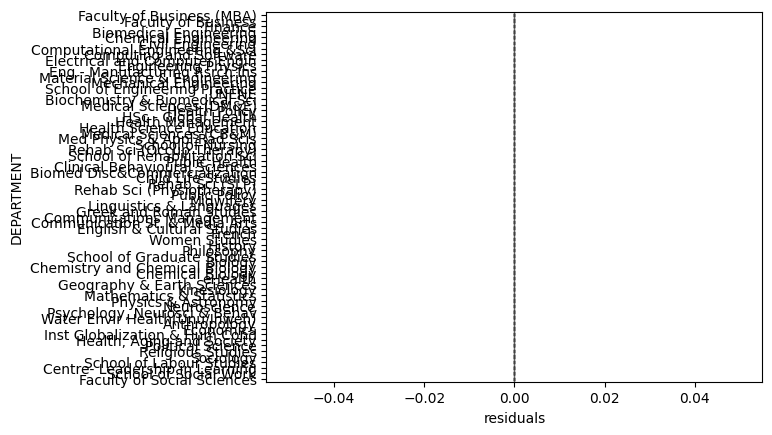

('2 - Zero Hunger', 1)


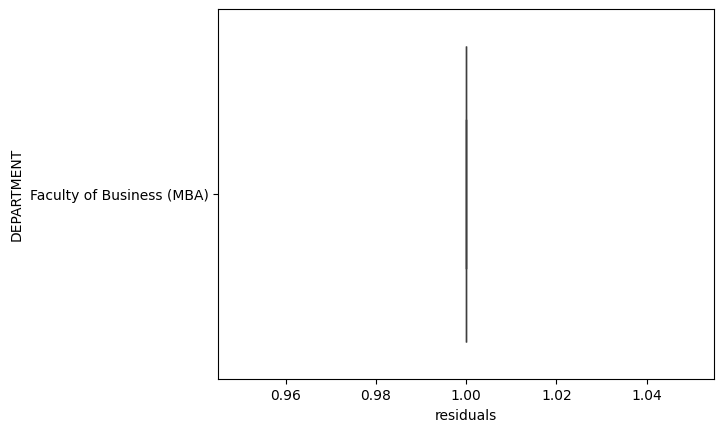

('3 - Good Health and Well-Being', 0)


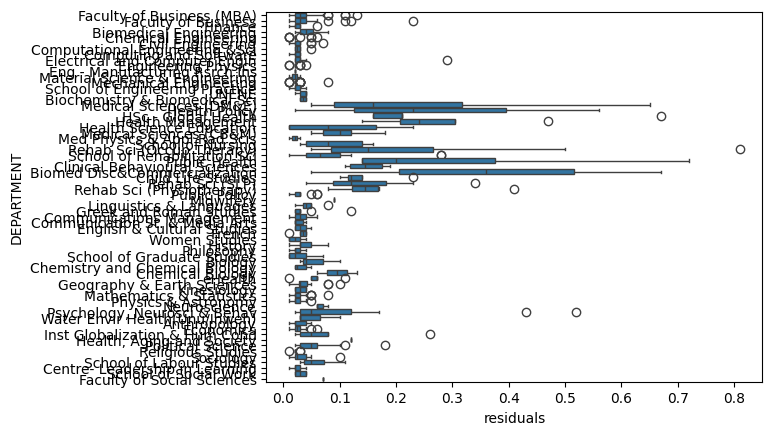

('3 - Good Health and Well-Being', 1)


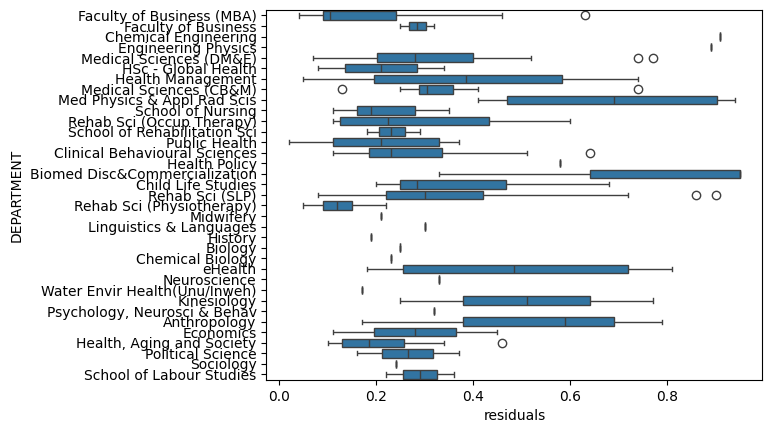

('4 - Quality Education', 0)


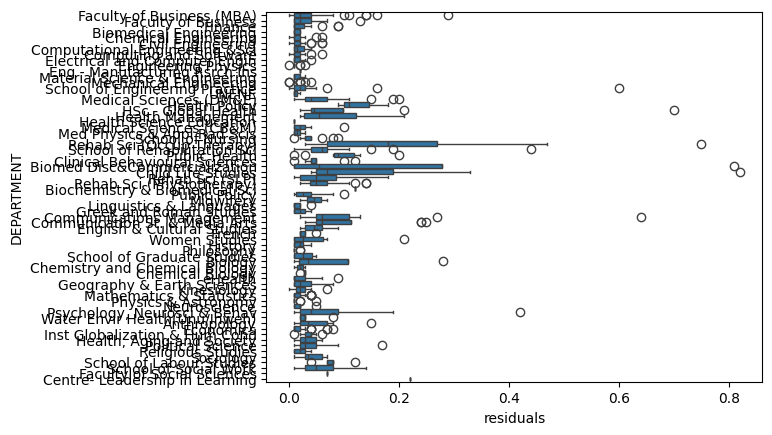

('4 - Quality Education', 1)


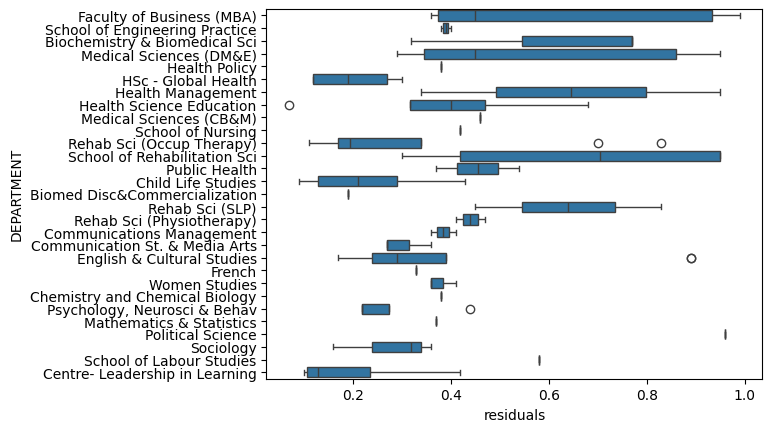

('5 - Gender Equality', 0)


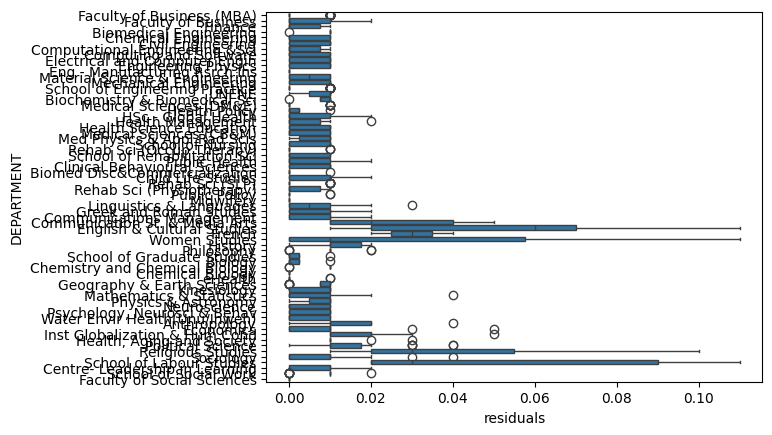

('5 - Gender Equality', 1)


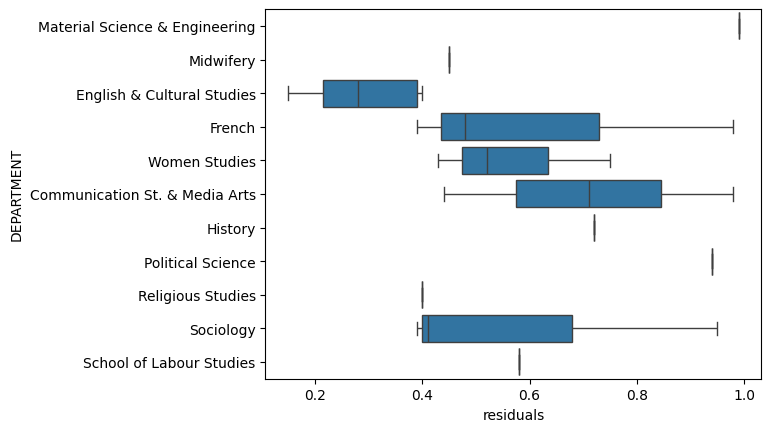

('6 - Clean Water and Sanitation', 0)


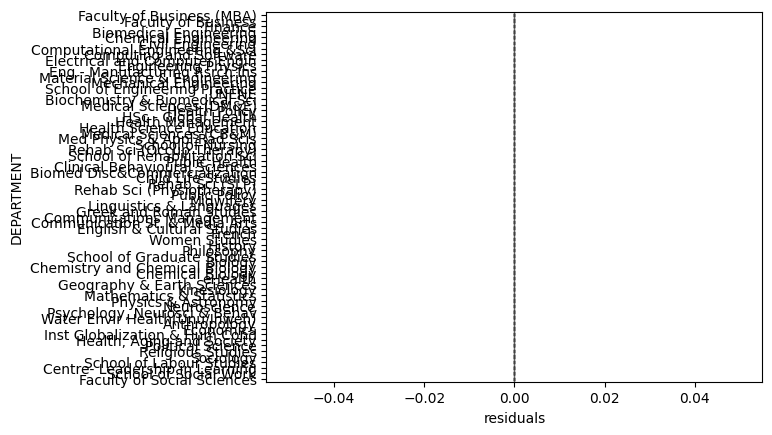

('6 - Clean Water and Sanitation', 1)


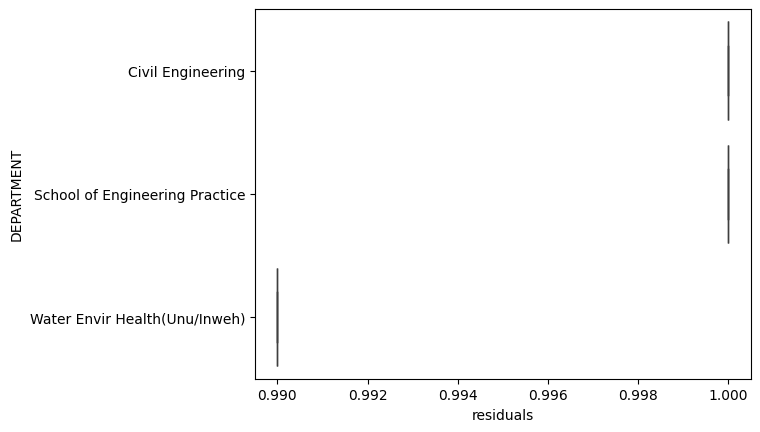

('7 - Affordable and Clean Energy', 0)


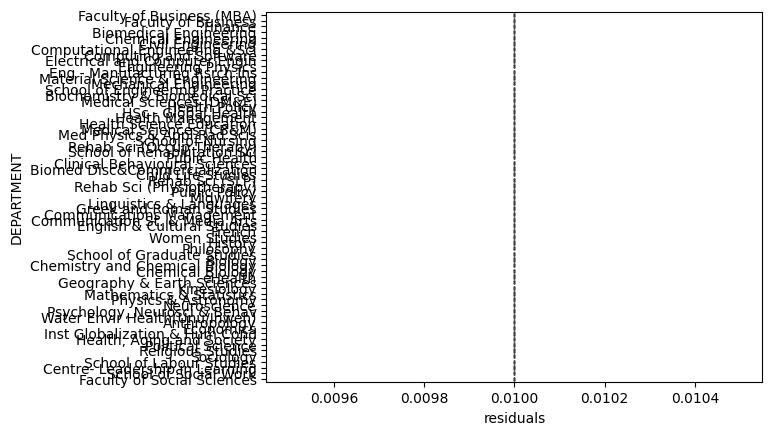

('7 - Affordable and Clean Energy', 1)


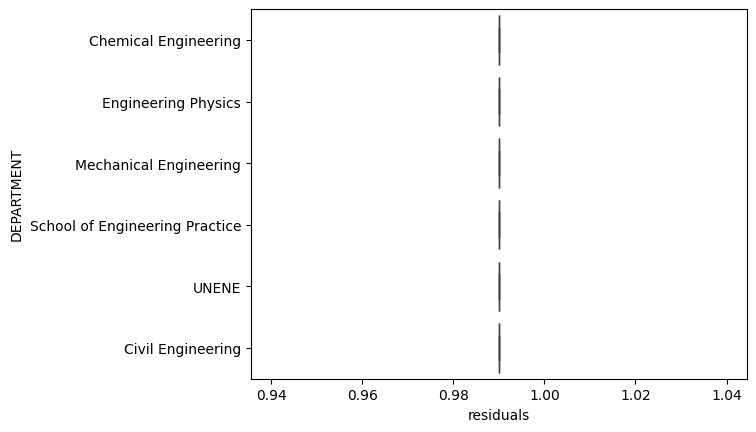

('8 - Decent Work and Economic Growth', 0)


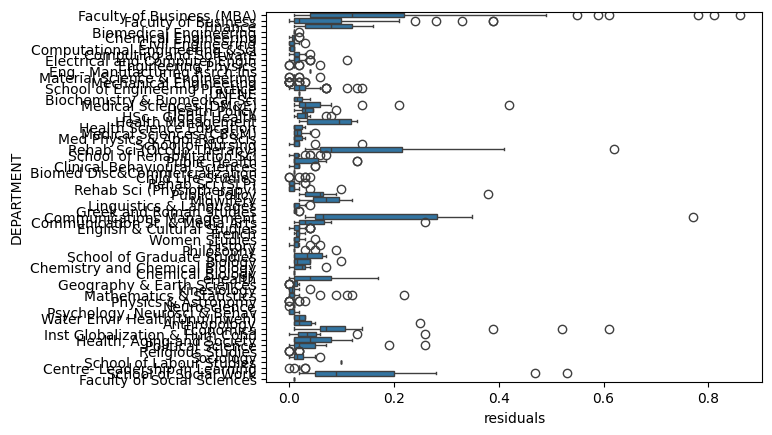

('8 - Decent Work and Economic Growth', 1)


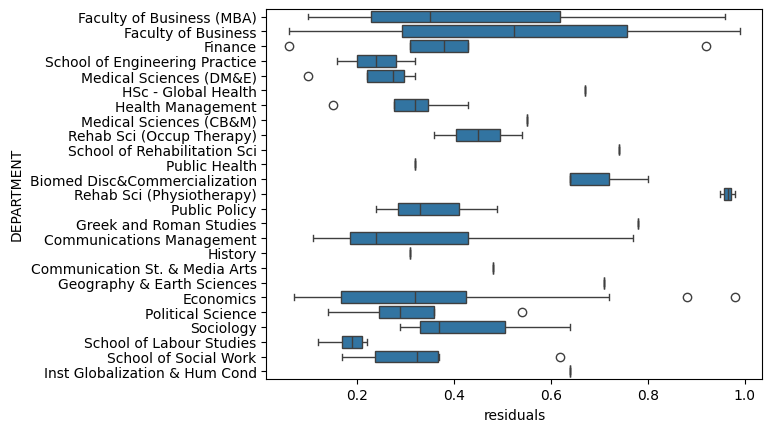

('9 - Industry, Innovation, and Infrastructure', 0)


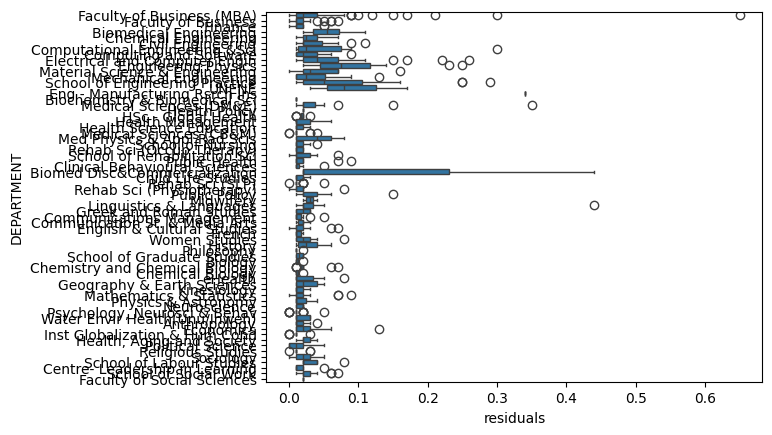

('9 - Industry, Innovation, and Infrastructure', 1)


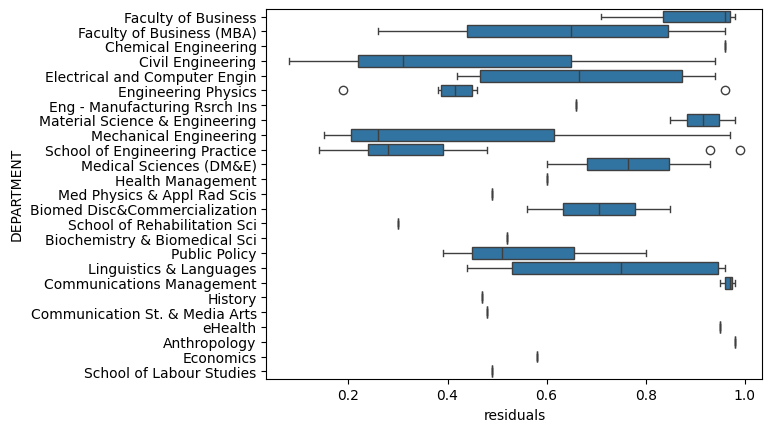

In [53]:
def graph_boxplot(df, stratify_by="DEPARTMENT"):
    sns.boxplot(df, x="residuals", y=stratify_by)
    plt.show()


for group_names, group in combined.groupby(["sdg_name", "original_label"]):
    print(group_names)
    graph_boxplot(group)